
This is the sentiment dataset.
It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment .
It contains the following 6 fields:

target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
ids: The id of the tweet ( 2087)
date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
flag: The query (lyx). If there is no query, then this value is NO_QUERY.
user: the user that tweeted (robotickilldozr)
text: the text of the tweet (Lyx is cool)

In [12]:
import os 
os.getcwd()

'/Users/chaitanyabhardwaj/sentiment analysis'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
col_names=["target", "id", "date", "flag", "user", "text"]
data_first_50k= pd.read_csv("training.1600000.processed (1).csv", header=None, encoding='ISO-8859-1', names=col_names, nrows=50000)
data_first_50k.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
col_names=["target", "id", "date", "flag", "user", "text"]
data_last_50k=pd.read_csv("training.1600000.processed (1).csv", header=None, encoding='ISO-8859-1', names=col_names, skiprows=1550000)
data_last_50k.head(5)

,target,id,date,flag,user,text
0,4,2183672808,Mon Jun 15 14:49:44 PDT 2009,NO_QUERY,tweeteradder31,@clg_cnd Get 100 followers a day using www.twe...
1,4,2183672820,Mon Jun 15 14:49:44 PDT 2009,NO_QUERY,ryanculling,Home from work. Start again at 8am. Epic.
2,4,2183672843,Mon Jun 15 14:49:44 PDT 2009,NO_QUERY,D_Roya,@robdyrdek that record was funny as hell
3,4,2183672871,Mon Jun 15 14:49:44 PDT 2009,NO_QUERY,Rawryn,FINDING NEMO!!!! HELL YEAH text me: 480.299.6988
4,4,2183672874,Mon Jun 15 14:49:44 PDT 2009,NO_QUERY,MaternalSpark,@glassidentities Yay! she's on twitter too..fo...


In [4]:
data_first_50k['target'].value_counts(), data_last_50k['target'].value_counts()

(0    50000
 Name: target, dtype: int64,
 4    50000
 Name: target, dtype: int64)

In [6]:
data=pd.concat([data_first_50k,data_last_50k],axis=0)
data.shape
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
data.reset_index(inplace=True)

In [8]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
y=data['target']
le=LabelEncoder()
y=le.fit_transform(y)
type(y)
np.unique(y, return_counts=True)

(array([0, 1]), array([50000, 50000]))

In [9]:
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chaitanyabhardwaj/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chaitanyabhardwaj/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [10]:
lemma=WordNetLemmatizer()
corpus=[]

for i in range(0, len(data)):
    tweet=re.sub(r'\$\w*', '', data['text'][i])
    tweet=re.sub(r'^RT[\s]+', '', tweet)
    tweet=re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet=re.sub(r'#', '', tweet)
    tokenizer=TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet=tokenizer.tokenize(tweet)
    
    tweet=[lemma.lemmatize(word) for word in tweet if (word not in stopwords.words('english') and word not in string.punctuation)]
    tweet=' '.join(tweet)
    corpus.append(tweet)

In [11]:
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

     |████████████████████████████████| 220 kB 1.6 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/chaitanyabhardwaj/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/y2/8rppfmdd51j6s_pg321h3pbm0000gn/T/pip-install-afbz8rzo/wordcloud/setup.py'"'"'; __file__='"'"'/private/var/folders/y2/8rppfmdd51j6s_pg321h3pbm0000gn/T/pip-install-afbz8rzo/wordcloud/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/y2/8rppfmdd51j6s_pg321h3pbm0000gn/T/pip-wheel-3kxz0uyx
       cwd: /private/var/folders/y2/8rppfmdd51j6s_pg321h3pbm0000gn/T/pip-install-afbz8rzo/wordcloud/
  Complete output (24 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.9-x86_64-3.8
  creating build/lib.macosx-10.9-x86_64-3

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
corpus_df=pd.DataFrame(corpus,columns=['Corpus'])
corpus_df[:5]

In [ ]:
wordcloud=WordCloud(background_color="black",width=1600, height=800, random_state=0, collocations=False, stopwords=STOPWORDS).generate(' '.join(corpus_df['Corpus'].tolist()))

plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [76]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.RdBu):
    
    plt.figure(figsize=(20,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [55]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

In [56]:
vocabulary_size=10000
onehot_representation=[one_hot(words, vocabulary_size) for words in corpus]
onehot_representation[:20]

[[],
 [2165, 3637, 4583, 418, 8304, 6389, 3123, 3577, 4288, 5929, 1945, 7859],
 [7416, 9991, 8581, 5999, 6389, 2456, 3013, 1193, 6542, 209],
 [9016, 4148, 6227, 2795, 4662, 9725],
 [4682, 4952, 523, 3637, 389],
 [9016, 4320],
 [206, 3850],
 [7184, 508, 8581, 389, 2184, 4937, 795, 795, 4190, 4952, 2650, 2681, 8449],
 [4010],
 [8148, 3709],
 [8745, 4978, 1674, 1079, 1686],
 [5142, 69, 5528],
 [4107, 4789, 3099, 2357, 8821, 666],
 [1578, 1262, 3358, 3591, 8827, 5955],
 [5428, 340, 681, 7826, 1901, 4576, 6441, 3248],
 [2203, 5067, 4789, 5917, 7599],
 [4882, 5408, 2248, 3330, 3560, 4789, 3772, 4596, 8029, 5120],
 [503, 861],
 [2123, 5153, 5362, 3474, 389, 8525, 8421, 7155],
 [938, 6335, 8639, 7492, 8831, 1696]]

In [57]:
sentence_length=15
embedded_documents=pad_sequences(onehot_representation, padding='pre', maxlen=sentence_length)
print(embedded_documents[:20])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 2165 3637 4583  418 8304 6389 3123 3577 4288 5929 1945
  7859]
 [   0    0    0    0    0 7416 9991 8581 5999 6389 2456 3013 1193 6542
   209]
 [   0    0    0    0    0    0    0    0    0 9016 4148 6227 2795 4662
  9725]
 [   0    0    0    0    0    0    0    0    0    0 4682 4952  523 3637
   389]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0 9016
  4320]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0  206
  3850]
 [   0    0 7184  508 8581  389 2184 4937  795  795 4190 4952 2650 2681
  8449]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
  4010]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0 8148
  3709]
 [   0    0    0    0    0    0    0    0    0    0 8745 4978 1674 1079
  1686]
 [   0    0    0    0    0    0    0    0    0    0    0    0 5142   69
  5528]
 [   0    0    0    0    0    0    0    

In [77]:
dimension=45
model_lstm=Sequential()
model_lstm.add(Embedding(vocabulary_size, dimension, input_length=sentence_length))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model_lstm.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 15, 45)            450000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               58400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 508,501
Trainable params: 508,501
Non-trainable params: 0
_________________________________________________________________
None


In [78]:
X=np.array(embedded_documents)
y=np.array(y)

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=0)

In [80]:
model_lstm.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=5, batch_size=32)

Epoch 1/5
2500/2500 [==============================] - 65s 25ms/step - loss: 0.5291 - accuracy: 0.7327 - val_loss: 0.4953 - val_accuracy: 0.7563
Epoch 2/5
2500/2500 [==============================] - 58s 23ms/step - loss: 0.4601 - accuracy: 0.7797 - val_loss: 0.5017 - val_accuracy: 0.7552
Epoch 3/5
2500/2500 [==============================] - 52s 21ms/step - loss: 0.4169 - accuracy: 0.8053 - val_loss: 0.5162 - val_accuracy: 0.7484
Epoch 4/5
2500/2500 [==============================] - 51s 20ms/step - loss: 0.3784 - accuracy: 0.8239 - val_loss: 0.5618 - val_accuracy: 0.7444
Epoch 5/5
2500/2500 [==============================] - 58s 23ms/step - loss: 0.3376 - accuracy: 0.8449 - val_loss: 0.6518 - val_accuracy: 0.7380


In [81]:
pred_lstm=model_lstm.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

Confusion matrix, without normalization


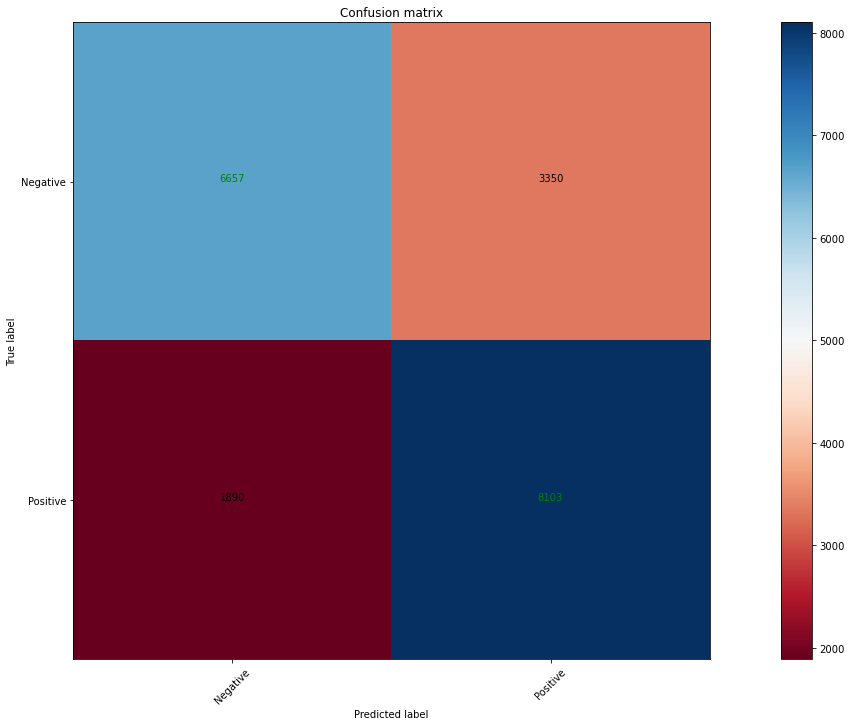

In [83]:
cm=confusion_matrix(y_test, pred_lstm.round())

import itertools
plot_confusion_matrix(cm, classes=['Negative', 'Positive'])

In [84]:
print(classification_report(y_test, pred_lstm.round()))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72     10007
           1       0.71      0.81      0.76      9993

    accuracy                           0.74     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.74      0.74      0.74     20000

